## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: Target feature. Binary.	Income >50K, <=50K.

In [ ]:
import pandas as pd
pd.__version__ # 1.4.1

'2.2.2'

In [ ]:
columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns, na_values='?', skipinitialspace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
print(df.tail(10))

       age      workclass  fnlwgt      education  education-num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital-status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
num_rows, num_columns = df.shape
print(f"Количество строк: {num_rows}, Количество колонок: {num_columns}")

Количество строк: 32561, Количество колонок: 15


3) Какие типы данных у элементов этого датасета?

In [ ]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [ ]:
missing = df.isnull().sum()
print("признаки имеют пропуски:")
print(missing[missing > 0])

признаки имеют пропуски:
Series([], dtype: int64)


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

*Ваш* ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
workclassCounts = df['workclass'].value_counts(dropna=False)
print("Количество различных рабочих классов:")
print(workclassCounts)

Количество различных рабочих классов:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

8) Постройте гистограмму(bar) распределения образования людей (education)

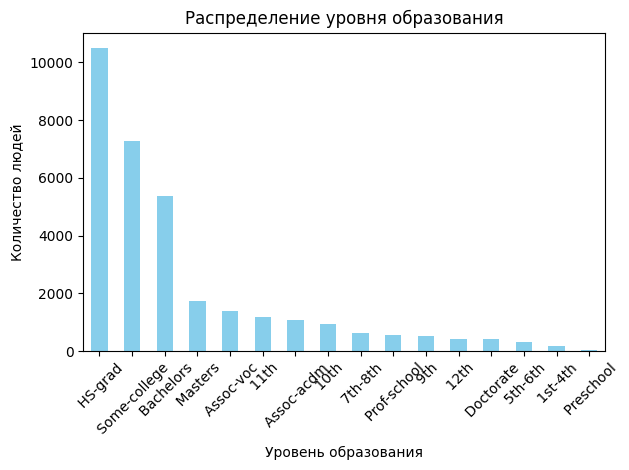

In [ ]:
import matplotlib.pyplot as plt

df['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
high_income = df[df['income'] == '>50K']['age']
low_income = df[df['income'] == '<=50K']['age']

mean_high_income = high_income.mean()
std_high_income = high_income.std()

mean_low_income = low_income.mean()
std_low_income = low_income.std()

mean_high_income = round(mean_high_income)
std_high_income = round(std_high_income, 2)

mean_low_income = round(mean_low_income)
std_low_income = round(std_low_income, 2)

print(f"Average age >50K: {mean_high_income}, СКО: {std_high_income}")
print(f"Average age <=50K: {mean_low_income}, СКО: {std_low_income}")

Средний возраст >50K: 44, СКО: 10.52
Средний возраст <=50K: 37, СКО: 14.02


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

high_income = df[df['income'] == '>50K']
high_income_education_check = high_income['education'].isin(higher_education)

without_higher_education_count = high_income[~high_income_education_check].shape[0]

if high_income_education_check.all():
    print("Все люди с доходом >50K имеют высшее образование.")
else:
    print("Неправда")
    print(f"Количество людей с доходом >50K без высшего образования: {without_higher_education_count}")

Неправда
Количество людей с доходом >50K без высшего образования: 3306


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
single_statuses = df['marital-status'].unique()
single_statuses = [status for status in single_statuses if status not in married_statuses]

married_high_income_ratio = df[(df['sex'] == 'Male') & (df['marital-status'].isin(married_statuses)) & (df['income'] == '>50K')].shape[0] / df[(df['sex'] == 'Male') & (df['marital-status'].isin(married_statuses))].shape[0]
single_high_income_ratio = df[(df['sex'] == 'Male') & (df['marital-status'].isin(single_statuses)) & (df['income'] == '>50K')].shape[0] / df[(df['sex'] == 'Male') & (df['marital-status'].isin(single_statuses))].shape[0]

print(f"Доля зарабатывающих >50K среди женатых мужчин: {married_high_income_ratio:.2%}")
print(f"Доля зарабатывающих >50K среди холостых мужчин: {single_high_income_ratio:.2%}")

Доля зарабатывающих >50K среди женатых мужчин: 44.05%
Доля зарабатывающих >50K среди холостых мужчин: 8.45%


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [ ]:
avg_hours_per_country = df.groupby(['native-country', 'income'])['hours-per-week'].mean().round().unstack()
print(avg_hours_per_country)

income                      <=50K  >50K
native-country                         
Cambodia                     41.0  40.0
Canada                       38.0  46.0
China                        37.0  39.0
Columbia                     39.0  50.0
Cuba                         38.0  42.0
Dominican-Republic           42.0  47.0
Ecuador                      38.0  49.0
El-Salvador                  36.0  45.0
England                      40.0  45.0
France                       41.0  51.0
Germany                      39.0  45.0
Greece                       42.0  51.0
Guatemala                    39.0  37.0
Haiti                        36.0  43.0
Holand-Netherlands           40.0   NaN
Honduras                     34.0  60.0
Hong                         39.0  45.0
Hungary                      31.0  50.0
India                        38.0  46.0
Iran                         41.0  48.0
Ireland                      41.0  48.0
Italy                        40.0  45.0
Jamaica                      38.0  41.0


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [ ]:
df['capital_diff'] = df['capital-gain'] - df['capital-loss']

df['capital_diff_cat'] = pd.cut(df['capital_diff'], bins=10, labels=False)

pivot_table = df.pivot_table(index='education', columns='capital_diff_cat', values='capital_diff', aggfunc='count', fill_value=0)
print(pivot_table)

capital_diff_cat      0    1   2   3  4   9
education                                  
10th                926    3   1   1  0   2
11th               1158   17   0   0  0   0
12th                425    7   1   0  0   0
1st-4th             167    1   0   0  0   0
5th-6th             329    4   0   0  0   0
7th-8th             639    7   0   0  0   0
9th                 513    0   0   0  0   1
Assoc-acdm         1026   38   2   0  0   1
Assoc-voc          1322   56   2   1  0   1
Bachelors          4909  383  10  12  0  41
Doctorate           350   40  10   1  0  12
HS-grad           10261  207   4   6  0  23
Masters            1512  176   7   9  1  18
Preschool            50    0   0   0  1   0
Prof-school         442   73   9   6  0  46
Some-college       7070  195   9   3  0  14


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
female_high_income = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
country_high_income = female_high_income['native-country'].value_counts(normalize=True) * 100

country_high_income = country_high_income.round(2)

print("Страны, где женщины получают большую зарплату >50K чаще:")
print(country_high_income.sort_values(ascending=False))

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
import numpy as np

df['magic_salary'] = df['income'].apply(lambda x: np.random.randint(0, 51) if x == '<=50K' else np.random.randint(51, 201))

education_magic_salary = df.groupby('education')['magic_salary'].mean().round().sort_values(ascending=False)

print("Средняя зарплата в час для каждого уровня образования (отсортировано по убыванию и округлено до ближайшего целого):")
print(education_magic_salary)

Средняя зарплата в час для каждого уровня образования (отсортировано по убыванию и округлено до ближайшего целого):
education
Doctorate       100.0
Prof-school      97.0
Masters          82.0
Bachelors        66.0
Assoc-voc        51.0
Assoc-acdm       48.0
Some-college     44.0
HS-grad          41.0
10th             32.0
12th             32.0
7th-8th          32.0
9th              32.0
11th             30.0
1st-4th          30.0
5th-6th          29.0
Preschool        25.0
Name: magic_salary, dtype: float64
